**Hello Visitor,**

**This is one of my first attempts at making a detailed and well thought out kernels, hope you gain some insights from it and find it useful! Do upvote and share it if you like it! :)**


***This kernel has covered 4 topics:***
- Basic Introduction
- EDA
- Feature Engineering
- Model Building

**The name of the competition is Tabular Playground Series - Apr 2021**

**The tag line is Synthanic - You're going to need a bigger boat**



![Titanic Ship Credits:Canoe1967/wikipeida.org](https://www.marineinsight.com/wp-content/uploads/2010/10/titanic.jpg)

**The competition description:**


Kaggle competitions are incredibly fun and rewarding, but they can also be intimidating for people who are relatively new in their data science journey. In the past, we've launched many Playground competitions that are more approachable than our Featured competitions and thus, more beginner-friendly.

In order to have a more consistent offering of these competitions for our community, we're trying a new experiment in 2021. We'll be launching month-long tabular Playground competitions on the 1st of every month and continue the experiment as long as there's sufficient interest and participation.

The goal of these competitions is to provide a fun, and approachable for anyone, tabular dataset. These competitions will be great for people looking for something in between the Titanic Getting Started competition and a Featured competition. If you're an established competitions master or grandmaster, these probably won't be much of a challenge for you. We encourage you to avoid saturating the leaderboard.

For each monthly competition, we'll be offering Kaggle Merchandise for the top three teams. And finally, because we want these competitions to be more about learning, we're limiting team sizes to 3 individuals.

The dataset is used for this competition is synthetic but based on a real dataset (in this case, the actual Titanic data!) and generated using a CTGAN. The statistical properties of this dataset are very similar to the original Titanic dataset, but there's no way to "cheat" by using public labels for predictions. How well does your model perform on truly private test labels?


**Task at hand:**

Your task is to predict whether or not a passenger survived the sinking of the Synthanic (a synthetic, much larger dataset based on the actual Titanic dataset). For each PasengerId row in the test set, you must predict a 0 or 1 value for the Survived target.

Your score is the percentage of passengers you correctly predict. This is known as accuracy.


**Other things to Note:**

**Points** : This competition does not award ranking points

**Tiers** : This competition does not count towards tiers


**Little bit about the Titanic:**

Titanic, in full Royal Mail Ship (RMS) Titanic, British luxury passenger liner that sank on April 14–15, 1912, during its maiden voyage, en route to New York City from Southampton, England, killing about 1,500 passengers and ship personnel. One of the most famous tragedies in modern history, it inspired numerous stories, several films, and a musical and has been the subject of much scholarship and scientific speculation.

![The Real Titanic](https://cdn.britannica.com/68/185468-050-C0D53622/Titanic-iceberg-British-15-1912.jpg)

In [1]:
# Importing the basic libariries 
# We will import the others later this is just to get the analysis started :P

import os
import joblib
import numpy as np
import pandas as pd
import warnings

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

# **Importing the data**

In [2]:
# Importing the data 

train_df = pd.read_csv('/kaggle/input/tabular-playground-series-apr-2021/train.csv')
test_df = pd.read_csv('/kaggle/input/tabular-playground-series-apr-2021/test.csv')

**Number of Rows and Columns**

In [3]:
print('Rows and Columns in train dataset:', train_df.shape)
print('Rows and Columns in test dataset:', test_df.shape)

Rows and Columns in train dataset: (100000, 12)
Rows and Columns in test dataset: (100000, 11)


**Numbers of missing values**

In [4]:
print('Missing values in train dataset:', sum(train_df.isnull().sum()))
print('Missing values in test dataset:', sum(test_df.isnull().sum()))

Missing values in train dataset: 76165
Missing values in test dataset: 79909


**Missing values per columns in train and test dataset**

In [5]:
print('Missing values per columns in train dataset')
for col in train_df.columns:
    temp_col = train_df[col].isnull().sum()
    print(f'{col}: {temp_col}')
print()
print('Missing values per columns in test dataset')
for col in test_df.columns:
    temp_col = test_df[col].isnull().sum()
    print(f'{col}: {temp_col}')

Missing values per columns in train dataset
PassengerId: 0
Survived: 0
Pclass: 0
Name: 0
Sex: 0
Age: 3292
SibSp: 0
Parch: 0
Ticket: 4623
Fare: 134
Cabin: 67866
Embarked: 250

Missing values per columns in test dataset
PassengerId: 0
Pclass: 0
Name: 0
Sex: 0
Age: 3487
SibSp: 0
Parch: 0
Ticket: 5181
Fare: 133
Cabin: 70831
Embarked: 277


**Top 5 rows in the train dataset**

In [6]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


**The data contains the following information:**

1. Pclass - a proxy for socio-economic status (SES) where 1st = Upper, 2nd = Middle and 3rd = Lower.
2. Sex - male and female.
3. Age - fractional if it less than 1 and age estimation in the form of xx.5.
4. SibSp - number of siblings / spouses aboard the Synthanic; siblings are brother, sister, stepbrother and stepsister and spouses are husband and wife (mistresses and fiancés were ignored).
5. Parch - # of parents / children aboard the Synthanic; parents are mother and father; child are daughter, son, stepdaughter and stepson. Some children travelled only with a nanny, therefore Parch is 0 for them.
6. Fare - the paassenger fare.
7. Cabin - the cabin number.
8. Emarked - port of embarkation where C is Cherbourg, Q is Queenstown and S is Southampton.
9. Ticket - ticket number.
10. Name - passengers name.
11. Survived - target variable where 0 is not survived and 1 is survived


**Variable Notes**
* **pclass**: A proxy for socio-economic status (SES)
 * 1st = Upper
 * 2nd = Middle
 * 3rd = Lower


* **age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5


* **sibsp**: The dataset defines family relations in this way...
 * Sibling = brother, sister, stepbrother, stepsister
 * Spouse = husband, wife (mistresses and fiancés were ignored)
 

* **parch**: The dataset defines family relations in this way...
 * Parent = mother, father
 * Child = daughter, son, stepdaughter, stepson
 * Some children travelled only with a nanny, therefore parch=0 for them.
 
 
 
**Types Of Features**
- Categorical Features:
   - A categorical variable is one that has two or more categories and each value in that feature can be categorised by them.For example, gender is a categorical variable having two categories (male and female). Now we cannot sort or give any ordering to such variables. They are also known as Nominal Variables.
   - Categorical Features in the dataset: Sex,Embarked.

- Ordinal Features:
   - An ordinal variable is similar to categorical values, but the difference between them is that we can have relative ordering or sorting between the values. For eg: If we have a feature like Height with values Tall, Medium, Short, then Height is a ordinal variable. Here we can have a relative sort in the variable.
   - Ordinal Features in the dataset: PClass

- Continous Feature:
   - A feature is said to be continous if it can take values between any two points or between the minimum or maximum values in the features column.
   - Continous Features in the dataset: Age

# **Analysis**

The first thing we are going to check is the distribution of the target feature. It's important to know if the class is balanced or not. If so, we would probably have to handle it.

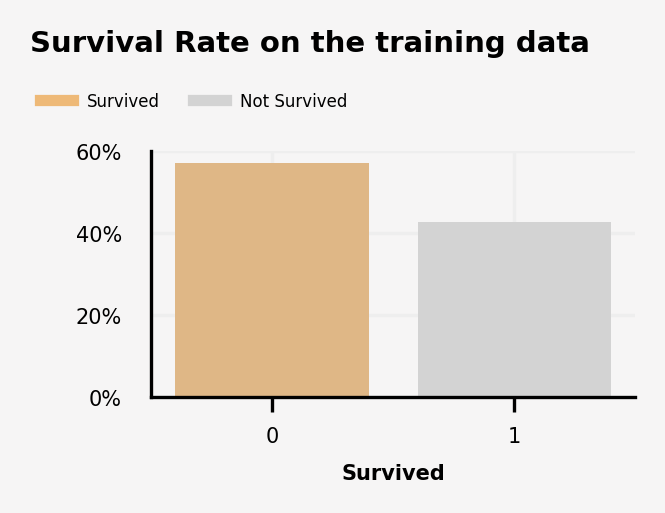

In [7]:
plt.rcParams['figure.dpi'] = 300
fig = plt.figure(figsize=(5, 5), facecolor='#f6f5f5')
gs = fig.add_gridspec(3, 2)
gs.update(wspace=0.4, hspace=0.8)

background_color = "#f6f5f5"

# background_color = "#f6f5f5"
column = 'Survived'
color_map = ['#eeb977', 'lightgray']
sns.set_palette(sns.color_palette(color_map))
temp_train = pd.DataFrame(train_df[column].value_counts()).reset_index(drop=False)
ax0 = fig.add_subplot(gs[0, 0])
for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)
ax0.set_facecolor(background_color)
ax0.tick_params(axis = "y", which = "both", left = False)
ax0.text(-1, 83, 'Survival Rate on the training data', color='black', fontsize=7, ha='left', va='bottom', weight='bold')
# ax0.text(-1, 82, 'Survival Rate ', color='#292929', fontsize=5, ha='left', va='top')
# ax0.text(1.18, 73.3, 'for age and fare', color='#292929', fontsize=4, ha='left', va='bottom')
ax0_sns = sns.barplot(ax=ax0, x=temp_train['index'], y=temp_train[column]/1000, zorder=2)
ax0_sns.set_xlabel("Survived",fontsize=5, weight='bold')
ax0_sns.set_ylabel('')
ax0.yaxis.set_major_formatter(ticker.PercentFormatter())
ax0_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE')
ax0_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE')
ax0_sns.tick_params(labelsize=5)
ax0_sns.legend(['Survived', 'Not Survived'], ncol=2, facecolor=background_color, edgecolor=background_color, fontsize=4, bbox_to_anchor=(-0.26, 1.3), loc='upper left')
leg = ax0_sns.get_legend()
leg.legendHandles[0].set_color('#eeb977')
leg.legendHandles[1].set_color('lightgray')

#### **Obeservations :**
- #### There are 57,226 of Synthanic passengers not survived 
- #### 42,774 survived the accident
- #### Converted to survival rate of 57.2% for not survived and 42.8% for survived

# **Checking the Null Values :**

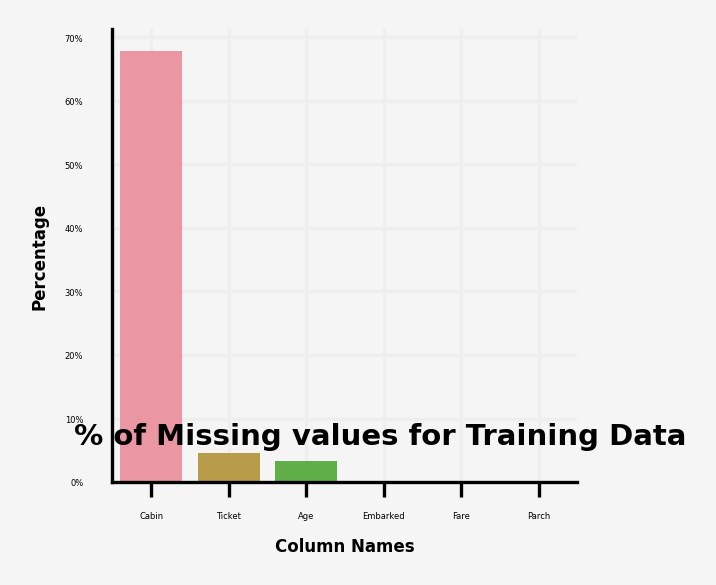

In [8]:
nan_data = (train_df.isna().sum().sort_values(ascending=False) / len(train_df) * 100)[:6]
nan_data_1 = pd.DataFrame(data = nan_data,columns=["Missing % "]).reset_index()
a4_dims = (11.7, 8.27)
plt.rcParams['figure.dpi'] = 300
fig = plt.figure(figsize=(2, 2), facecolor='#f6f5f5')
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0.4, hspace=0.8)

background_color = "#f6f5f5"

column = 'Missing % '
color_map = ['#eeb977', 'lightgray']
sns.set_palette(sns.color_palette(color_map))
temp_train = nan_data_1
ax0 = fig.add_subplot(gs[0, 0])
for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)
ax0.set_facecolor(background_color)

ax0.tick_params(axis = "y", which = "both", left = False)
ax0.text(-1, 5, '% of Missing values for Training Data', color='black', fontsize=7, ha='left', va='bottom', weight='bold')
# ax0.text(-1, 5, 'Survival Rate ', color='#292929', fontsize=5, ha='left', va='top')
ax0_sns = sns.barplot(ax=ax0, x=temp_train['index'], y=temp_train[column], zorder=2 )
ax0_sns.set_xlabel("Column Names",fontsize=4, weight='bold')
ax0_sns.set_ylabel("Percentage",fontsize=4, weight='bold')
ax0.yaxis.set_major_formatter(ticker.PercentFormatter())
ax0_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE')
ax0_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE')
ax0_sns.tick_params(labelsize=2)



# **Now comparing the data between the Training and the Test data!**

This section will try to explore and compare features in the train and test dataset. It should be noted that some features are not the same between train and test dataset as can be seen more detail on each sub-sections.

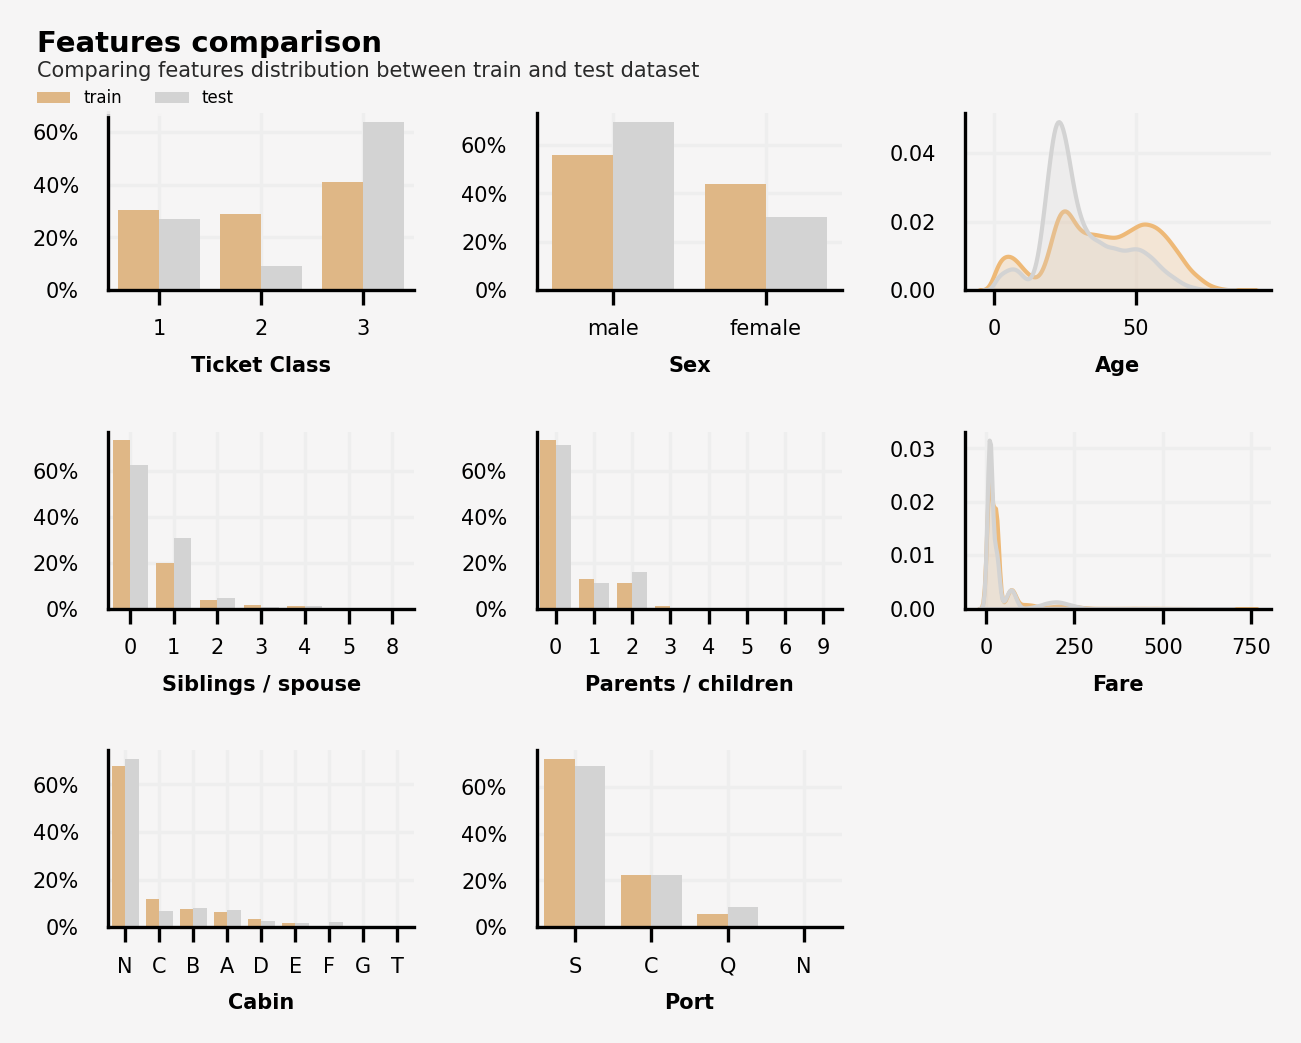

In [9]:
plt.rcParams['figure.dpi'] = 300
fig = plt.figure(figsize=(5, 5), facecolor='#f6f5f5')
gs = fig.add_gridspec(4, 3)
gs.update(wspace=0.4, hspace=0.8)

background_color = "#f6f5f5"
color_map = ['#eeb977', 'lightgray']
sns.set_palette(sns.color_palette(color_map))

column = 'Pclass'
temp_train = pd.DataFrame(train_df[column].value_counts()).reset_index(drop=False)
temp_train['source'] = 'train'
temp_test = pd.DataFrame(test_df[column].value_counts()).reset_index(drop=False)
temp_test['source'] = 'test'
temp_combine = pd.concat([temp_train, temp_test], axis=0)
ax0 = fig.add_subplot(gs[0, 0])
for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)
ax0.set_facecolor(background_color)
ax0.tick_params(axis = "y", which = "both", left = False)
ax0.text(-1.2, 88, 'Features comparison', color='black', fontsize=7, ha='left', va='bottom', weight='bold')
ax0.text(-1.2, 87, 'Comparing features distribution between train and test dataset', color='#292929', fontsize=5, ha='left', va='top')
ax0_sns = sns.barplot(ax=ax0, x=temp_combine['index'], y=temp_combine[column]/1000, zorder=2, hue=temp_combine['source'])
ax0_sns.set_xlabel("Ticket Class",fontsize=5, weight='bold')
ax0_sns.set_ylabel('')
ax0.yaxis.set_major_formatter(ticker.PercentFormatter())
ax0_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE')
ax0_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE')
ax0_sns.tick_params(labelsize=5)
ax0_sns.legend(ncol=2, facecolor=background_color, edgecolor=background_color, fontsize=4, bbox_to_anchor=(0.46, 1.22))

column = 'Sex'
temp_train = pd.DataFrame(train_df[column].value_counts()).reset_index(drop=False)
temp_train['source'] = 'train'
temp_test = pd.DataFrame(test_df[column].value_counts()).reset_index(drop=False)
temp_test['source'] = 'test'
temp_combine = pd.concat([temp_train, temp_test], axis=0)
ax1 = fig.add_subplot(gs[0, 1])
for s in ["right", "top"]:
    ax1.spines[s].set_visible(False)
ax1.set_facecolor(background_color)
ax1.legend(prop={'size': 3})
ax1.tick_params(axis = "y", which = "both", left = False)
ax1_sns = sns.barplot(ax=ax1, x=temp_combine['index'], y=temp_combine[column]/1000, zorder=2, hue=temp_combine['source'])
ax1_sns.set_xlabel('Sex', fontsize=5, weight='bold')
ax1_sns.set_ylabel('')
ax1.yaxis.set_major_formatter(ticker.PercentFormatter())
ax1_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE')
ax1_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE')
ax1_sns.tick_params(labelsize=5)
ax1_sns.get_legend().remove()

column = 'Age'
ax3 = fig.add_subplot(gs[0, 2])
for s in ["right", "top"]:
    ax3.spines[s].set_visible(False)
ax3.set_facecolor(background_color)
ax3.legend(prop={'size': 3})
ax3.tick_params(axis = "y", which = "both", left = False)
ax3_sns = sns.kdeplot(ax=ax3, x=train_df['Age'], zorder=2, shade=True)
ax3_sns = sns.kdeplot(ax=ax3, x=test_df['Age'], zorder=2, shade=True)
ax3_sns.set_xlabel('Age', fontsize=5, weight='bold')
ax3_sns.set_ylabel('')
ax3_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE')
ax3_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE')
ax3_sns.tick_params(labelsize=5)
ax3_sns.get_legend().remove()

column = 'SibSp'
temp_train = pd.DataFrame(train_df[column].value_counts()).reset_index(drop=False)
temp_train['source'] = 'train'
temp_test = pd.DataFrame(test_df[column].value_counts()).reset_index(drop=False)
temp_test['source'] = 'test'
temp_combine = pd.concat([temp_train, temp_test], axis=0)
ax4 = fig.add_subplot(gs[1, 0])
for s in ["right", "top"]:
    ax4.spines[s].set_visible(False)
ax4.set_facecolor(background_color)
ax4.legend(prop={'size': 3})
ax4.tick_params(axis = "y", which = "both", left = False)
ax4_sns = sns.barplot(ax=ax4, x=temp_combine['index'], y=temp_combine[column]/1000, zorder=2, hue=temp_combine['source'])
ax4_sns.set_xlabel('Siblings / spouse', fontsize=5, weight='bold')
ax4_sns.set_ylabel('')
ax4.yaxis.set_major_formatter(ticker.PercentFormatter())
ax4_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE')
ax4_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE')
ax4_sns.tick_params(labelsize=5)
ax4_sns.get_legend().remove()

column = 'Parch'
temp_train = pd.DataFrame(train_df[column].value_counts()).reset_index(drop=False)
temp_train['source'] = 'train'
temp_test = pd.DataFrame(test_df[column].value_counts()).reset_index(drop=False)
temp_test['source'] = 'test'
temp_combine = pd.concat([temp_train, temp_test], axis=0)
ax5 = fig.add_subplot(gs[1, 1])
for s in ["right", "top"]:
    ax5.spines[s].set_visible(False)
ax5.set_facecolor(background_color)
ax5.legend(prop={'size': 3})
ax5.tick_params(axis = "y", which = "both", left = False)
ax5_sns = sns.barplot(ax=ax5, x=temp_combine['index'], y=temp_combine[column]/1000, zorder=2, hue=temp_combine['source'])
ax5_sns.set_xlabel('Parents / children', fontsize=5, weight='bold')
ax5_sns.set_ylabel('')
ax5.yaxis.set_major_formatter(ticker.PercentFormatter())
ax5_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE')
ax5_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE')
ax5_sns.tick_params(labelsize=5)
ax5_sns.get_legend().remove()

column = 'Fare'
ax6 = fig.add_subplot(gs[1, 2])
for s in ["right", "top"]:
    ax6.spines[s].set_visible(False)
ax6.set_facecolor(background_color)
ax6.legend(prop={'size': 3})
ax6.tick_params(axis = "y", which = "both", left = False)
ax6_sns = sns.kdeplot(ax=ax6, x=train_df['Fare'], zorder=2, shade=True)
ax6_sns = sns.kdeplot(ax=ax6, x=test_df['Fare'], zorder=2, shade=True)
ax6_sns.set_xlabel('Fare', fontsize=5, weight='bold')
ax6_sns.set_ylabel('')
ax6_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE')
ax6_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE')
ax6_sns.tick_params(labelsize=5)
ax6_sns.get_legend().remove()

train_df["Cabin"] = train_df["Cabin"].fillna("No")
train_df["Cabin_code"] = train_df["Cabin"].str[0]
test_df["Cabin"] = test_df["Cabin"].fillna("No")
test_df["Cabin_code"] = test_df["Cabin"].str[0]

column = 'Cabin_code'
temp_train = pd.DataFrame(train_df[column].value_counts()).reset_index(drop=False)
temp_train['source'] = 'train'
temp_test = pd.DataFrame(test_df[column].value_counts()).reset_index(drop=False)
temp_test['source'] = 'test'
temp_combine = pd.concat([temp_train, temp_test], axis=0)
ax7 = fig.add_subplot(gs[2, 0])
for s in ["right", "top"]:
    ax7.spines[s].set_visible(False)
ax7.set_facecolor(background_color)
ax7.legend(prop={'size': 3})
ax7.tick_params(axis = "y", which = "both", left = False)
ax7_sns = sns.barplot(ax=ax7, x=temp_combine['index'], y=temp_combine[column]/1000, zorder=2, hue=temp_combine['source'])
ax7_sns.set_xlabel('Cabin', fontsize=5, weight='bold')
ax7_sns.set_ylabel('')
ax7.yaxis.set_major_formatter(ticker.PercentFormatter())
ax7_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE')
ax7_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE')
ax7_sns.tick_params(labelsize=5)
ax7_sns.get_legend().remove()

train_df["Embarked"] = train_df["Embarked"].fillna("N")
test_df["Embarked"] = test_df["Embarked"].fillna("N")

column = 'Embarked'
temp_train = pd.DataFrame(train_df[column].value_counts()).reset_index(drop=False)
temp_train['source'] = 'train'
temp_test = pd.DataFrame(test_df[column].value_counts()).reset_index(drop=False)
temp_test['source'] = 'test'
temp_combine = pd.concat([temp_train, temp_test], axis=0)
ax8 = fig.add_subplot(gs[2, 1])
for s in ["right", "top"]:
    ax8.spines[s].set_visible(False)
ax8.set_facecolor(background_color)
ax8.legend(prop={'size': 3})
ax8.tick_params(axis = "y", which = "both", left = False)
ax8_sns = sns.barplot(ax=ax8, x=temp_combine['index'], y=temp_combine[column]/1000, zorder=2, hue=temp_combine['source'])
ax8_sns.set_xlabel('Port', fontsize=5, weight='bold')
ax8_sns.set_ylabel('')
ax8.yaxis.set_major_formatter(ticker.PercentFormatter())
ax8_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE')
ax8_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE')
ax8_sns.tick_params(labelsize=5)
ax8_sns.get_legend().remove()

plt.show()

**Pclass**

1. Proportions between each classes are different in the train and test:
 1. Class 3 in train dataset contributes 40% while in test dataset, it has a contribution above 60%.
 2. Class 2 is at a very low of 10% in test dataset while in train dataset, it contributes around 30%.
 3. Class 1 in the train and test dataset are quite the same but it is higher in the train dataset.


**Sex**

1. Proportions between each classes are different in the train and test:
 - female contributed more than 40% in train dataset while in test dataset female only contributed 30% of total dataset.
 - male contributed more than 50% in the train and test dataset.


**Age**

1. Distribution between train and test dataset are different especially on range of 15-40.
2. There are missing value in the train and test dataset, they are 3,292 and 3,487, respectively.


**SibSp**

1. Number of siblings / spouses can be categorize into 7 categories, this feature can be treated as a continuous or categorical and see how the model performed.
2. There is 10% differences on passenger that travel with 1 sibbling / spose between train and test dataset.
3. The highest / maximum number of sibblings / spouses that is going aboard with the passengers is 8 people and the lowest is traveling without any sibblings / spouses.
4. Most of Synthanic passenger don't travel with their sibblings / sposes.


**Parch**

1. Number of parents / children can be categorize into 8 categories, this feature can also be treated as a continuous or categorical.
2. The highest number of parents / children is 8 people and the lowest is 0 meaning the passengers is traveling without their parents / childrens.
3. This features strenghten the idea that most of the Synthanic passengers are traveling alone.


**Fare**

1. Fare distribution between train and test dataset are quite resemble each other, though it's not perfect especially in the lower fare.
2. The highest fare in train dataset is 744.66 while in test dataset is 680.7.
3. The lowest fare in test dataset is 0.05 and 0.68 in the train dataset.
4. The average fare is 43.9 in train dataset and 45.4 in test dataset, not a far gap between them.
5. Missing value in this feature are 134 in train dataset and 133 in test dataset.


**Cabin**

1. Cabin numbers can extracted by taking the first letter in the feature.
2. Be aware that this feature has the highest number of missing value of 67,866 in train dataset and 70,831 in test dataset, meaaning it's almost 70% of the information are missing. A new cabin category N is created to address passengers without cabin number.
3. Cabin can be categorize into 9 categories, this feature can be treated as a continuous or categorical and see how the model performed.
4. There is quite a distinct imbalance data between train and test dataset in cabin C.
 

**Embarked**

1. A new embarked category N is created to address passengers without port of Embarkation.
2. Most of Synthanic passengers are embarked from Southampton which contributes almost 70% of the passengers.
3. There are 205 missing values in train dataset and 277 missing values in the test dataset.


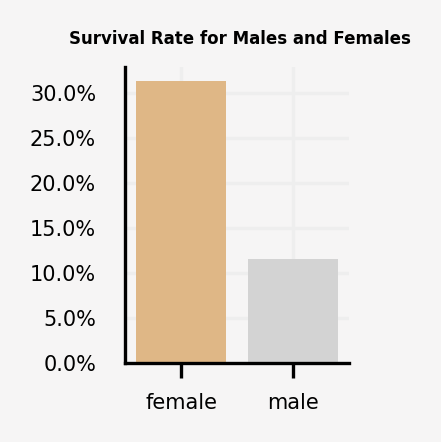

In [10]:
plt.rcParams['figure.dpi'] = 300
fig = plt.figure(figsize=(5, 6), facecolor='#f6f5f5')
gs = fig.add_gridspec(3, 4)
gs.update(wspace=0.4, hspace=0.8)

background_color = "#f6f5f5"
color_map = ['#eeb977', 'lightgray']
sns.set_palette(sns.color_palette(color_map))
column = 'Sex'
color_map = ['#eeb977', 'lightgray']
sns.set_palette(sns.color_palette(color_map))
temp_train = train_df.groupby(column)['Survived'].sum()
ax2 = fig.add_subplot(gs[0, 2])
for s in ["right", "top"]:
    ax2.spines[s].set_visible(False)
ax2.set_facecolor(background_color)
ax2.tick_params(axis = "y", which = "both", left = False)
ax2.text(-1, 35, 'Survival Rate for Males and Females', color='black', fontsize=4, ha='left', va='bottom', weight='bold')
ax2_sns = sns.barplot(ax=ax2, x=temp_train.index, y=temp_train/1000, zorder=2)
ax2_sns.set_xlabel('')
ax2_sns.set_ylabel('')
ax2.yaxis.set_major_formatter(ticker.PercentFormatter())
ax2_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE')
ax2_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE')
ax2_sns.tick_params(labelsize=5)
plt.show()

Female has higher chance to survived at 31.2% compared to male, this may also be the result of lifeboat priority for female than male.
Male has survival rate at 11.5% which is a far below Female.

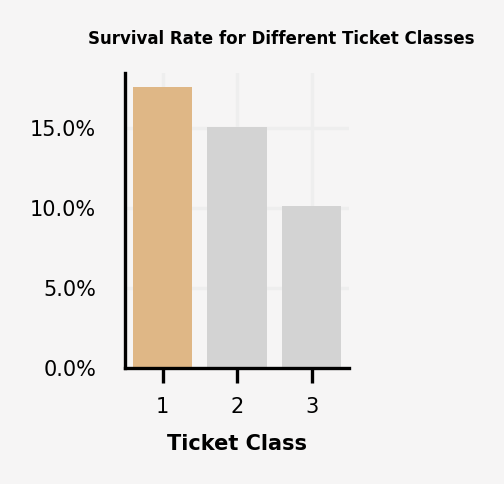

In [11]:
plt.rcParams['figure.dpi'] = 300
fig = plt.figure(figsize=(5, 6), facecolor='#f6f5f5')
gs = fig.add_gridspec(3, 4)
gs.update(wspace=0.4, hspace=0.8)

column = 'Pclass'
color_map = ['#eeb977', 'lightgray', 'lightgray']
sns.set_palette(sns.color_palette(color_map))
temp_train = train_df.groupby(column)['Survived'].sum()
ax1 = fig.add_subplot(gs[0, 1])
for s in ["right", "top"]:
    ax1.spines[s].set_visible(False)
ax1.set_facecolor(background_color)
ax1.tick_params(axis = "y", which = "both", left = False)
ax1.text(-1, 20, 'Survival Rate for Different Ticket Classes', color='black', fontsize=4, ha='left', va='bottom', weight='bold')
ax1_sns = sns.barplot(ax=ax1, x=temp_train.index, y=temp_train/1000, zorder=2)
ax1_sns.set_xlabel("Ticket Class",fontsize=5, weight='bold')
ax1_sns.set_ylabel('')
ax1.yaxis.set_major_formatter(ticker.PercentFormatter())
ax1_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE')
ax1_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE')
ax1_sns.tick_params(labelsize=5)

**Pclass**

Ticket class 1 has the highest chance to survived with survival rate at 17.6% followed by class 2 with 15% and class 3 with 10.1%.
Higher ticket class has a higher chance to survived, this may be a result of lifeboat priority based on ticket class.

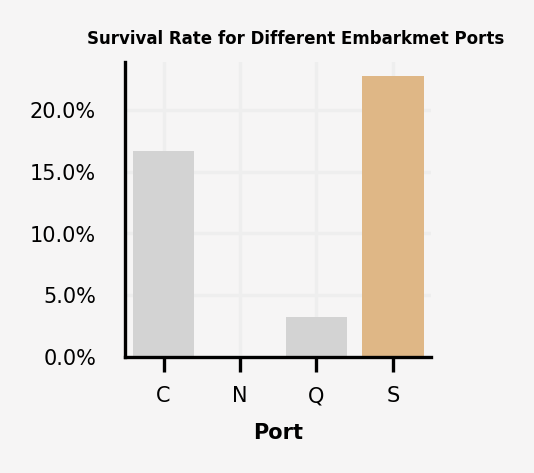

In [12]:
plt.rcParams['figure.dpi'] = 300
fig = plt.figure(figsize=(5, 6), facecolor='#f6f5f5')
gs = fig.add_gridspec(3, 3)
gs.update(wspace=0.4, hspace=0.8)


column = 'Embarked'
color_map = ['lightgray' for _ in range(4)]
color_map[3] = '#eeb977'
sns.set_palette(sns.color_palette(color_map))
temp_train = train_df.groupby(column)['Survived'].sum()
ax8 = fig.add_subplot(gs[2, 2])
for s in ["right", "top"]:
    ax8.spines[s].set_visible(False)
ax8.set_facecolor(background_color)
ax8.tick_params(axis = "y", which = "both", left = False)
ax8.text(-1, 25, 'Survival Rate for Different Embarkmet Ports', color='black', fontsize=4, ha='left', va='bottom', weight='bold')
ax8_sns = sns.barplot(ax=ax8, x=temp_train.index, y=temp_train/1000, zorder=2)
ax8_sns.set_xlabel("Port",fontsize=5, weight='bold')
ax8_sns.set_ylabel('')
ax8.yaxis.set_major_formatter(ticker.PercentFormatter())
ax8_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE')
ax8_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE')
ax8_sns.tick_params(labelsize=5)

**Embarked**

- Passengers that embarked from Southampton have the highest chance to survived which is above 20%.
- The second highest survival rate are passengers that embarked from Cherbourg with 15% survival rate.

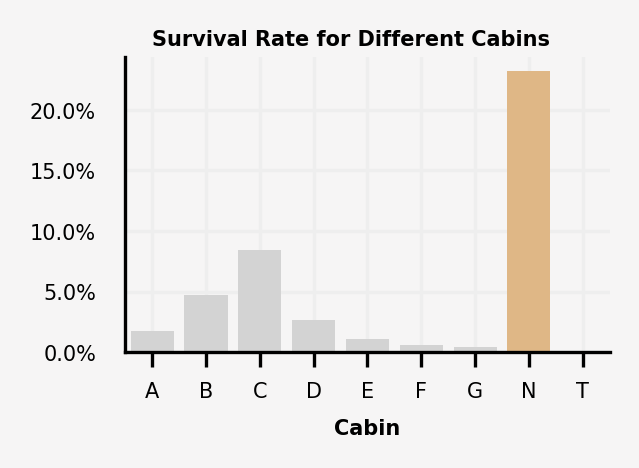

In [13]:
plt.rcParams['figure.dpi'] = 300
fig = plt.figure(figsize=(5, 6), facecolor='#f6f5f5')
gs = fig.add_gridspec(3, 2)
gs.update(wspace=0.4, hspace=0.8)

column = 'Cabin_code'
color_map = ['lightgray' for _ in range(9)]
color_map[7] = '#eeb977'
sns.set_palette(sns.color_palette(color_map))
temp_train = train_df.groupby(column)['Survived'].sum()
ax7 = fig.add_subplot(gs[1, 1])
for s in ["right", "top"]:
    ax7.spines[s].set_visible(False)
ax7.set_facecolor(background_color)
ax7.tick_params(axis = "y", which = "both", left = False)
ax7.text(0, 25, 'Survival Rate for Different Cabins', color='black', fontsize=5, ha='left', va='bottom', weight='bold')
ax7_sns = sns.barplot(ax=ax7, x=temp_train.index, y=temp_train/1000, zorder=2)
ax7_sns.set_xlabel("Cabin",fontsize=5, weight='bold')
ax7_sns.set_ylabel('')
ax7.yaxis.set_major_formatter(ticker.PercentFormatter())
ax7_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE')
ax7_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE')
ax7_sns.tick_params(labelsize=5)

**Cabin**

- There are many missing values in the cabin number which it hard to make an analysis on the survival rate.
- Passengers with unknown cabin (N) has the highest survival rate which is above 20% compared to others.
- Passengers with cabin C has the second highest survival rate that is above 5%.

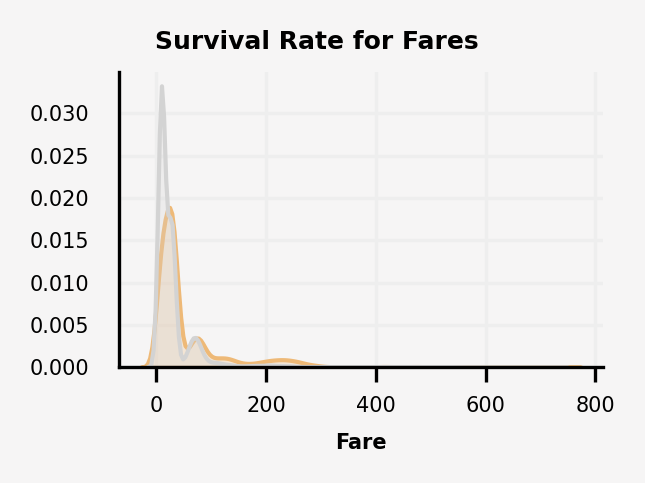

In [14]:
plt.rcParams['figure.dpi'] = 300
fig = plt.figure(figsize=(5, 6), facecolor='#f6f5f5')
gs = fig.add_gridspec(3, 2)
gs.update(wspace=0.4, hspace=0.8)

column = 'Fare'
color_map = ['#eeb977', 'lightgray']
sns.set_palette(sns.color_palette(color_map))
temp_train = train_df.groupby(column)['Survived'].sum()
ax6 = fig.add_subplot(gs[2, 0])
for s in ["right", "top"]:
    ax6.spines[s].set_visible(False)
ax6.set_facecolor(background_color)
ax6.tick_params(axis = "y", which = "both", left = False)
ax6.text(-2, .037, 'Survival Rate for Fares', color='black', fontsize=6, ha='left', va='bottom', weight='bold')
ax6_sns = sns.kdeplot(ax=ax6, x=train_df[train_df['Survived']==1]['Fare'], zorder=2, shade=True)
ax6_sns = sns.kdeplot(ax=ax6, x=train_df[train_df['Survived']==0]['Fare'], zorder=2, shade=True)
ax6_sns.set_xlabel("Fare",fontsize=5, weight='bold')
ax6_sns.set_ylabel('')
ax6_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE')
ax6_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE')
ax6_sns.tick_params(labelsize=5)

**Fare**

- Consistent with ticket class, passengers with lower fare have a lower chance to survived.
- It's expected that passengers that buy a low fare get a lower ticket class but further analysis will be needed to explore more.

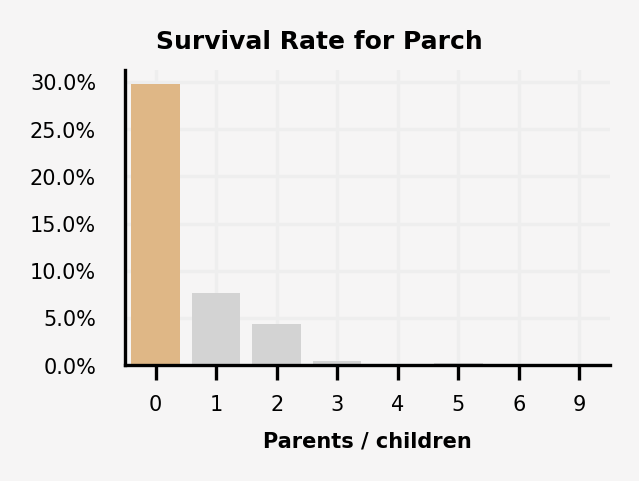

In [15]:
plt.rcParams['figure.dpi'] = 300
fig = plt.figure(figsize=(5, 6), facecolor='#f6f5f5')
gs = fig.add_gridspec(3, 2)
gs.update(wspace=0.4, hspace=0.8)

column = 'Parch'
color_map = ['lightgray' for _ in range(8)]
color_map[0] = '#eeb977'
sns.set_palette(sns.color_palette(color_map))
temp_train = train_df.groupby(column)['Survived'].sum()
ax5 = fig.add_subplot(gs[1, 1])
for s in ["right", "top"]:
    ax5.spines[s].set_visible(False)
ax5.set_facecolor(background_color)
ax5.tick_params(axis = "y", which = "both", left = False)
ax5.text(0, 33, 'Survival Rate for Parch', color='black', fontsize=6, ha='left', va='bottom', weight='bold')
ax5_sns = sns.barplot(ax=ax5, x=temp_train.index, y=temp_train/1000, zorder=2)
ax5_sns.set_xlabel("Parents / children",fontsize=5, weight='bold')
ax5_sns.set_ylabel('')
ax5.yaxis.set_major_formatter(ticker.PercentFormatter())
ax5_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE')
ax5_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE')
ax5_sns.tick_params(labelsize=5)

**Parch**

- As stated earlier, that most of the passengers in Synthanic are travel alone, this also make the survival rate for passenger that travel without parents / children are higher.
- Survival rate for passengers that travel without parents / children is almost 30% which is almost the same with the survival rate for passenger that travel without siblings / spouses.

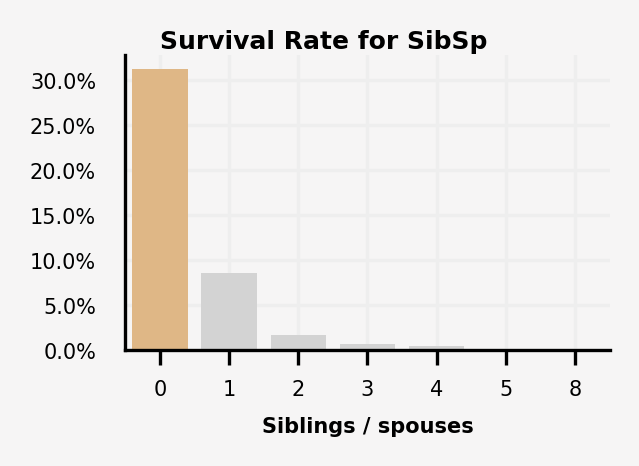

In [16]:
plt.rcParams['figure.dpi'] = 300
fig = plt.figure(figsize=(5, 6), facecolor='#f6f5f5')
gs = fig.add_gridspec(3, 2)
gs.update(wspace=0.4, hspace=0.8)
column = 'SibSp'
color_map = ['lightgray' for _ in range(7)]
color_map[0] = '#eeb977'
sns.set_palette(sns.color_palette(color_map))
temp_train = train_df.groupby(column)['Survived'].sum()
ax4 = fig.add_subplot(gs[1, 1])
for s in ["right", "top"]:
    ax4.spines[s].set_visible(False)
ax4.set_facecolor(background_color)
ax4.tick_params(axis = "y", which = "both", left = False)
ax4.text(0, 33, 'Survival Rate for SibSp', color='black', fontsize=6, ha='left', va='bottom', weight='bold')
ax4_sns = sns.barplot(ax=ax4, x=temp_train.index, y=temp_train/1000, zorder=2)
ax4_sns.set_xlabel("Siblings / spouses",fontsize=5, weight='bold')
ax4_sns.set_ylabel('')
ax4.yaxis.set_major_formatter(ticker.PercentFormatter())
ax4_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE')
ax4_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE')
ax4_sns.tick_params(labelsize=5)

**SibSp**

- Most of the passengers in Synthanic are travel alone, this make the survival rate for passengers without siblings / spouses higher than passengers with siblings / spouses.
- Survival rate for passengers without siblings / spouses are more than 30%.

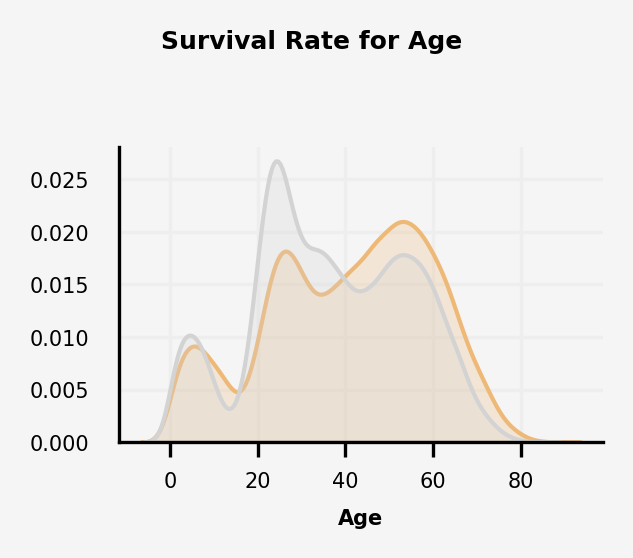

In [17]:
plt.rcParams['figure.dpi'] = 300
fig = plt.figure(figsize=(5, 6), facecolor='#f6f5f5')
gs = fig.add_gridspec(3, 2)
gs.update(wspace=0.4, hspace=0.8)

column = 'Age'
color_map = ['#eeb977', 'lightgray']
sns.set_palette(sns.color_palette(color_map))
temp_train = train_df.groupby(column)['Survived'].sum()
ax3 = fig.add_subplot(gs[1, 0])
for s in ["right", "top"]:
    ax3.spines[s].set_visible(False)
ax3.set_facecolor(background_color)
ax3.tick_params(axis = "y", which = "both", left = False)
ax3.text(-2, .037, 'Survival Rate for Age', color='black', fontsize=6, ha='left', va='bottom', weight='bold')

ax3_sns = sns.kdeplot(ax=ax3, x=train_df[train_df['Survived']==1]['Age'], zorder=2, shade=True)
ax3_sns = sns.kdeplot(ax=ax3, x=train_df[train_df['Survived']==0]['Age'], zorder=2, shade=True)
ax3_sns.set_xlabel("Age",fontsize=5, weight='bold')
ax3_sns.set_ylabel('')
ax3_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE')
ax3_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE')
ax3_sns.tick_params(labelsize=5)


**Age**

Passengers with age 15-40 have a lower chance to survived while older passengers at age 40 and above have a higher probability to survived, this may also due to lifeboat priority for older people.

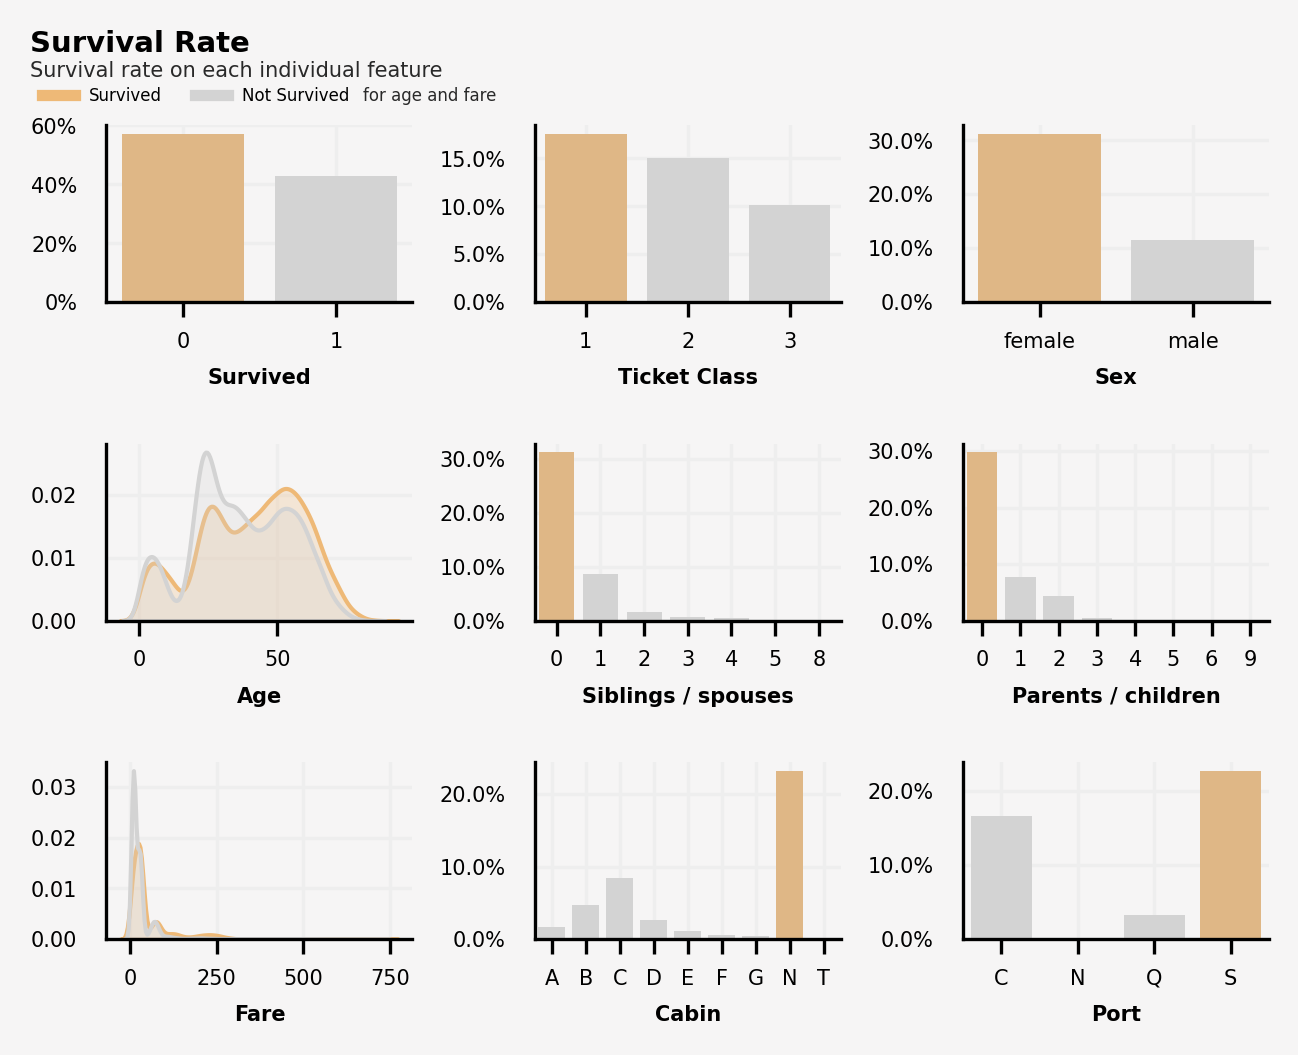

In [18]:
plt.rcParams['figure.dpi'] = 300
fig = plt.figure(figsize=(5, 5), facecolor='#f6f5f5')
gs = fig.add_gridspec(4, 3)
gs.update(wspace=0.4, hspace=0.8)

background_color = "#f6f5f5"

column = 'Survived'
color_map = ['#eeb977', 'lightgray']
sns.set_palette(sns.color_palette(color_map))
temp_train = pd.DataFrame(train_df[column].value_counts()).reset_index(drop=False)
ax0 = fig.add_subplot(gs[0, 0])
for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)
ax0.set_facecolor(background_color)
ax0.tick_params(axis = "y", which = "both", left = False)
ax0.text(-1, 83, 'Survival Rate', color='black', fontsize=7, ha='left', va='bottom', weight='bold')
ax0.text(-1, 82, 'Survival rate on each individual feature', color='#292929', fontsize=5, ha='left', va='top')
ax0.text(1.18, 73.3, 'for age and fare', color='#292929', fontsize=4, ha='left', va='top')
ax0_sns = sns.barplot(ax=ax0, x=temp_train['index'], y=temp_train[column]/1000, zorder=2)
ax0_sns.set_xlabel("Survived",fontsize=5, weight='bold')
ax0_sns.set_ylabel('')
ax0.yaxis.set_major_formatter(ticker.PercentFormatter())
ax0_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE')
ax0_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE')
ax0_sns.tick_params(labelsize=5)
ax0_sns.legend(['Survived', 'Not Survived'], ncol=2, facecolor=background_color, edgecolor=background_color, fontsize=4, bbox_to_anchor=(-0.26, 1.3), loc='upper left')
leg = ax0_sns.get_legend()
leg.legendHandles[0].set_color('#eeb977')
leg.legendHandles[1].set_color('lightgray')

column = 'Pclass'
color_map = ['#eeb977', 'lightgray', 'lightgray']
sns.set_palette(sns.color_palette(color_map))
temp_train = train_df.groupby(column)['Survived'].sum()
ax1 = fig.add_subplot(gs[0, 1])
for s in ["right", "top"]:
    ax1.spines[s].set_visible(False)
ax1.set_facecolor(background_color)
ax1.tick_params(axis = "y", which = "both", left = False)
ax1_sns = sns.barplot(ax=ax1, x=temp_train.index, y=temp_train/1000, zorder=2)
ax1_sns.set_xlabel("Ticket Class",fontsize=5, weight='bold')
ax1_sns.set_ylabel('')
ax1.yaxis.set_major_formatter(ticker.PercentFormatter())
ax1_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE')
ax1_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE')
ax1_sns.tick_params(labelsize=5)

column = 'Sex'
color_map = ['#eeb977', 'lightgray']
sns.set_palette(sns.color_palette(color_map))
temp_train = train_df.groupby(column)['Survived'].sum()
ax2 = fig.add_subplot(gs[0, 2])
for s in ["right", "top"]:
    ax2.spines[s].set_visible(False)
ax2.set_facecolor(background_color)
ax2.tick_params(axis = "y", which = "both", left = False)
ax2_sns = sns.barplot(ax=ax2, x=temp_train.index, y=temp_train/1000, zorder=2)
ax2_sns.set_xlabel("Sex",fontsize=5, weight='bold')
ax2_sns.set_ylabel('')
ax2.yaxis.set_major_formatter(ticker.PercentFormatter())
ax2_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE')
ax2_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE')
ax2_sns.tick_params(labelsize=5)

column = 'Age'
color_map = ['#eeb977', 'lightgray']
sns.set_palette(sns.color_palette(color_map))
temp_train = train_df.groupby(column)['Survived'].sum()
ax3 = fig.add_subplot(gs[1, 0])
for s in ["right", "top"]:
    ax3.spines[s].set_visible(False)
ax3.set_facecolor(background_color)
ax3.tick_params(axis = "y", which = "both", left = False)
ax3_sns = sns.kdeplot(ax=ax3, x=train_df[train_df['Survived']==1]['Age'], zorder=2, shade=True)
ax3_sns = sns.kdeplot(ax=ax3, x=train_df[train_df['Survived']==0]['Age'], zorder=2, shade=True)
ax3_sns.set_xlabel("Age",fontsize=5, weight='bold')
ax3_sns.set_ylabel('')
ax3_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE')
ax3_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE')
ax3_sns.tick_params(labelsize=5)

column = 'SibSp'
color_map = ['lightgray' for _ in range(7)]
color_map[0] = '#eeb977'
sns.set_palette(sns.color_palette(color_map))
temp_train = train_df.groupby(column)['Survived'].sum()
ax4 = fig.add_subplot(gs[1, 1])
for s in ["right", "top"]:
    ax4.spines[s].set_visible(False)
ax4.set_facecolor(background_color)
ax4.tick_params(axis = "y", which = "both", left = False)
ax4_sns = sns.barplot(ax=ax4, x=temp_train.index, y=temp_train/1000, zorder=2)
ax4_sns.set_xlabel("Siblings / spouses",fontsize=5, weight='bold')
ax4_sns.set_ylabel('')
ax4.yaxis.set_major_formatter(ticker.PercentFormatter())
ax4_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE')
ax4_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE')
ax4_sns.tick_params(labelsize=5)

column = 'Parch'
color_map = ['lightgray' for _ in range(8)]
color_map[0] = '#eeb977'
sns.set_palette(sns.color_palette(color_map))
temp_train = train_df.groupby(column)['Survived'].sum()
ax5 = fig.add_subplot(gs[1, 2])
for s in ["right", "top"]:
    ax5.spines[s].set_visible(False)
ax5.set_facecolor(background_color)
ax5.tick_params(axis = "y", which = "both", left = False)
ax5_sns = sns.barplot(ax=ax5, x=temp_train.index, y=temp_train/1000, zorder=2)
ax5_sns.set_xlabel("Parents / children",fontsize=5, weight='bold')
ax5_sns.set_ylabel('')
ax5.yaxis.set_major_formatter(ticker.PercentFormatter())
ax5_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE')
ax5_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE')
ax5_sns.tick_params(labelsize=5)

column = 'Fare'
color_map = ['#eeb977', 'lightgray']
sns.set_palette(sns.color_palette(color_map))
temp_train = train_df.groupby(column)['Survived'].sum()
ax6 = fig.add_subplot(gs[2, 0])
for s in ["right", "top"]:
    ax6.spines[s].set_visible(False)
ax6.set_facecolor(background_color)
ax6.tick_params(axis = "y", which = "both", left = False)
ax6_sns = sns.kdeplot(ax=ax6, x=train_df[train_df['Survived']==1]['Fare'], zorder=2, shade=True)
ax6_sns = sns.kdeplot(ax=ax6, x=train_df[train_df['Survived']==0]['Fare'], zorder=2, shade=True)
ax6_sns.set_xlabel("Fare",fontsize=5, weight='bold')
ax6_sns.set_ylabel('')
ax6_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE')
ax6_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE')
ax6_sns.tick_params(labelsize=5)

column = 'Cabin_code'
color_map = ['lightgray' for _ in range(9)]
color_map[7] = '#eeb977'
sns.set_palette(sns.color_palette(color_map))
temp_train = train_df.groupby(column)['Survived'].sum()
ax7 = fig.add_subplot(gs[2, 1])
for s in ["right", "top"]:
    ax7.spines[s].set_visible(False)
ax7.set_facecolor(background_color)
ax7.tick_params(axis = "y", which = "both", left = False)
ax7_sns = sns.barplot(ax=ax7, x=temp_train.index, y=temp_train/1000, zorder=2)
ax7_sns.set_xlabel("Cabin",fontsize=5, weight='bold')
ax7_sns.set_ylabel('')
ax7.yaxis.set_major_formatter(ticker.PercentFormatter())
ax7_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE')
ax7_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE')
ax7_sns.tick_params(labelsize=5)

column = 'Embarked'
color_map = ['lightgray' for _ in range(4)]
color_map[3] = '#eeb977'
sns.set_palette(sns.color_palette(color_map))
temp_train = train_df.groupby(column)['Survived'].sum()
ax8 = fig.add_subplot(gs[2, 2])
for s in ["right", "top"]:
    ax8.spines[s].set_visible(False)
ax8.set_facecolor(background_color)
ax8.tick_params(axis = "y", which = "both", left = False)
ax8_sns = sns.barplot(ax=ax8, x=temp_train.index, y=temp_train/1000, zorder=2)
ax8_sns.set_xlabel("Port",fontsize=5, weight='bold')
ax8_sns.set_ylabel('')
ax8.yaxis.set_major_formatter(ticker.PercentFormatter())
ax8_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE')
ax8_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE')
ax8_sns.tick_params(labelsize=5)

## Final EDA Observations

**Survived**

There are 57,226 of Synthanic passengers not survived and 42,774 survived the accident, converted to survival rate of 57.2% for not survived and 42.8% for survived.


**Pclass**

- Ticket class 1 has the highest chance to survived with survival rate at 17.6% followed by class 2 with 15% and class 3 with 10.1%.
- Higher ticket class has a higher chance to survived, this may be a result of lifeboat priority based on ticket class.


**Sex**

- Female has higher chance to survived at 31.2% compared to male, this may also be the result of lifeboat priority for female than male.
- Male has survival rate at 11.5% which is a far below Female.


**Age**

- Passengers with age 15-40 have a lower chance to survived while older passengers at age 40 and above have a higher probability to survived, this may also due to lifeboat priority for older people.


**SibSp**

- Most of the passengers in Synthanic are travel alone, this make the survival rate for passengers without siblings / spouses higher than passengers with siblings / spouses.
- Survival rate for passengers without siblings / spouses are more than 30%.


**Parch**

- As stated earlier, that most of the passengers in Synthanic are travel alone, this also make the survival rate for passenger that travel without parents / children are higher.
- Survival rate for passengers that travel without parents / children is almost 30% which is almost the same with the survival rate for passenger that travel without siblings / spouses.


**Fare**

- Consistent with ticket class, passengers with lower fare have a lower chance to survived.
- It's expected that passengers that buy a low fare get a lower ticket class but further analysis will be needed to explore more.


**Cabin**

- There are many missing values in the cabin number which it hard to make an analysis on the survival rate.
- Passengers with unknown cabin (N) has the highest survival rate which is above 20% compared to others.
- Passengers with cabin C has the second highest survival rate that is above 5%.


**Embarked**

- Passengers that embarked from Southampton have the highest chance to survived which is above 20%.
- The second highest survival rate are passengers that embarked from Cherbourg with 15% survival rate.

# Model

**CatBoost** is a machine learning algorithm that uses gradient boosting on decision trees. It is available as an open source library.

CatBoost supports training on GPUs.

Training on GPU is non-deterministic, because the order of floating point summations is non-deterministic in this implementation.

Choose the implementation for more details on the parameters that are required to start training on GPU.


https://catboost.ai/docs/concepts/python-reference_catboostclassifier.html#python-reference_catboostclassifier

In [19]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import  StratifiedKFold
from sklearn import metrics

In [20]:
ctypes = {
    'Survived':np.int8,
    'Pclass':np.int8,
    'Name':np.str,
    'Embarked':np.str,  
    'SibSp':np.int8,
    'Parch':np.int8,
}

           
train = pd.read_csv('../input/tabular-playground-series-apr-2021/train.csv',dtype=ctypes,index_col='PassengerId')
test = pd.read_csv('../input/tabular-playground-series-apr-2021/test.csv',dtype=ctypes,index_col='PassengerId')
submission = pd.read_csv('../input/tabular-playground-series-apr-2021/sample_submission.csv',dtype=ctypes,index_col='PassengerId')

In [21]:
train['Embarked'] = train['Embarked'].fillna('No')
test['Embarked'] = test['Embarked'].fillna('No')

train['Cabin'] = train['Cabin'].fillna('_')
test['Cabin'] = test['Cabin'].fillna('_')

train.Ticket = train.Ticket.map(lambda x:str(x).split()[0] if len(str(x).split()) > 1 else 'X')
test.Ticket = test.Ticket.map(lambda x:str(x).split()[0] if len(str(x).split()) > 1 else 'X')

train['CabinType'] = train['Cabin'].apply(lambda x:x[0])
test['CabinType'] = test['Cabin'].apply(lambda x:x[0])

train['Age'].fillna(round(train['Age'].mean()), inplace=True,)
test['Age'].fillna(round(test['Age'].mean()), inplace=True,)
train['Age'] = train['Age'].apply(round)
test['Age'] = test['Age'].apply(round)
train['Age'] = train['Age'].astype(np.int8)
test['Age'] = test['Age'].astype(np.int8)


train['Fare'].fillna(round(train['Fare'].mean()), inplace=True,)
test['Fare'].fillna(round(test['Fare'].mean()), inplace=True,)

train['FirstName'] = train['Name'].apply(lambda x:x.split(', ')[0])
train['SecondName'] = train['Name'].apply(lambda x:x.split(', ')[1])

test['FirstName'] = test['Name'].apply(lambda x:x.split(', ')[0])
test['SecondName'] = test['Name'].apply(lambda x:x.split(', ')[1])

train['n'] = 1
test['n'] = 1

gb = train.groupby('FirstName')
df_names = gb['n'].sum()
train['SameFirstName'] = train['FirstName'].apply(lambda x:df_names[x])

gb = test.groupby('FirstName')
df_names = gb['n'].sum()
test['SameFirstName'] = test['FirstName'].apply(lambda x:df_names[x])

train['SameFirstName'] = train['SameFirstName'].apply(lambda x:-1 if x>10 else x)
test['SameFirstName'] = test['SameFirstName'].apply(lambda x:-1 if x>10 else x)

train_female = train[train.Sex=='female']
train_male = train[train.Sex=='male']

In [22]:
columns = ['Pclass',  'Age','Embarked','Parch','SibSp','Fare','CabinType','Ticket','SameFirstName']
cat_features = ['Pclass','Embarked','CabinType','Ticket',]

models_f = []
num_folds=9
folds = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=2021) # create folds 
X_train = train_female[columns]
y_train = train_female['Survived']
for n_fold, (train_idx, valid_idx) in enumerate (folds.split(X_train,  y_train)):
    train_X, train_y = X_train.iloc[train_idx], y_train.iloc[train_idx]
    valid_X, valid_y = X_train.iloc[valid_idx], y_train.iloc[valid_idx]
    dataset = Pool(train_X, train_y, cat_features)
    evalset = Pool(valid_X, valid_y, cat_features)
    model_female = CatBoostClassifier(
        task_type="GPU", 
        depth=7,
        max_ctr_complexity=5,
        #border_count=1024, 
        iterations=50000,
        od_wait=500,od_type='Iter',       
        #l2_leaf_reg=0.01,
        learning_rate=0.0035,
        min_data_in_leaf=3
    
        )
    model_female.fit(dataset, plot=False, verbose=500,eval_set=evalset)
    models_f.append(model_female)
    y_pred_female = model_female.predict(train_female[columns])
    print(metrics.accuracy_score(train_female['Survived'], y_pred_female))

0:	learn: 0.6919355	test: 0.6918882	best: 0.6918882 (0)	total: 100ms	remaining: 1h 23m 36s
500:	learn: 0.5413118	test: 0.5346828	best: 0.5346828 (500)	total: 40.6s	remaining: 1h 6m 48s
1000:	learn: 0.5318225	test: 0.5261215	best: 0.5261215 (1000)	total: 1m 20s	remaining: 1h 5m 22s
1500:	learn: 0.5289993	test: 0.5243814	best: 0.5243814 (1500)	total: 1m 58s	remaining: 1h 3m 58s
2000:	learn: 0.5273425	test: 0.5236298	best: 0.5236298 (2000)	total: 2m 36s	remaining: 1h 2m 32s
2500:	learn: 0.5262392	test: 0.5232527	best: 0.5232527 (2500)	total: 3m 12s	remaining: 1h 58s
3000:	learn: 0.5253772	test: 0.5229804	best: 0.5229804 (3000)	total: 3m 48s	remaining: 59m 39s
3500:	learn: 0.5247690	test: 0.5228465	best: 0.5228455 (3485)	total: 4m 23s	remaining: 58m 24s
4000:	learn: 0.5242816	test: 0.5227456	best: 0.5227456 (4000)	total: 4m 58s	remaining: 57m 8s
4500:	learn: 0.5238493	test: 0.5226552	best: 0.5226532 (4493)	total: 5m 32s	remaining: 55m 59s
5000:	learn: 0.5234371	test: 0.5225657	best: 0.5225

In [23]:
columns = ['Pclass',  'Age','Embarked','Parch','SibSp','Fare','CabinType','Ticket']
cat_features = ['Pclass','Embarked','CabinType','Ticket']

models_m = []
num_folds=9
folds = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=2021) # create folds 
X_train = train_male[columns]
y_train = train_male['Survived']
for n_fold, (train_idx, valid_idx) in enumerate (folds.split(X_train,  y_train)):
    train_X, train_y = X_train.iloc[train_idx], y_train.iloc[train_idx]
    valid_X, valid_y = X_train.iloc[valid_idx], y_train.iloc[valid_idx]
    dataset = Pool(train_X, train_y, cat_features)
    evalset = Pool(valid_X, valid_y, cat_features)
    model_male = CatBoostClassifier(
        task_type="GPU", 
        depth=6,
        max_ctr_complexity=15,
        #border_count=1024, 
        iterations=50000,
        od_wait=400,od_type='Iter',       
        #l2_leaf_reg=0.01,
        learning_rate=0.04,
        min_data_in_leaf=3
        )
    model_male.fit(dataset, plot=False, verbose=500,eval_set=evalset)
    models_m.append(model_male)
    y_pred_male = model_male.predict(train_male[columns])
    print(metrics.accuracy_score(train_male['Survived'], y_pred_male))
    

0:	learn: 0.6707615	test: 0.6697101	best: 0.6697101 (0)	total: 60.2ms	remaining: 50m 11s
500:	learn: 0.4253237	test: 0.4228133	best: 0.4228003 (496)	total: 29.1s	remaining: 47m 56s
1000:	learn: 0.4228819	test: 0.4227554	best: 0.4226340 (760)	total: 54.8s	remaining: 44m 42s
bestTest = 0.4226340483
bestIteration = 760
Shrink model to first 761 iterations.
0.8185301350821542
0:	learn: 0.6705303	test: 0.6703254	best: 0.6703254 (0)	total: 59.9ms	remaining: 49m 52s
500:	learn: 0.4253203	test: 0.4305881	best: 0.4305850 (495)	total: 28.9s	remaining: 47m 32s
1000:	learn: 0.4232741	test: 0.4296998	best: 0.4296998 (1000)	total: 53.5s	remaining: 43m 39s
1500:	learn: 0.4224563	test: 0.4292909	best: 0.4292908 (1498)	total: 1m 17s	remaining: 41m 44s
2000:	learn: 0.4219255	test: 0.4291267	best: 0.4291130 (1897)	total: 1m 41s	remaining: 40m 31s
2500:	learn: 0.4215617	test: 0.4290514	best: 0.4290483 (2485)	total: 2m 4s	remaining: 39m 32s
3000:	learn: 0.4212781	test: 0.4289449	best: 0.4289449 (3000)	tota

In [24]:
%%time
columns = ['Pclass',  'Age','Embarked','Parch','SibSp','Fare','CabinType','Ticket','SameFirstName']
m_columns_f = []
for idx,m in enumerate(models_f):
    new_column = 'fm_{}'.format(idx)
    m_columns_f.append(new_column)
    test[new_column] = m.predict(test[columns])
    print(new_column, end=' ')
print()
m_columns_m = []
columns = ['Pclass',  'Age','Embarked','Parch','SibSp','Fare','CabinType','Ticket']
for idx,m in enumerate(models_m):
    new_column = 'm_{}'.format(idx)
    m_columns_m.append(new_column)
    test[new_column] = m.predict(test[columns])
    print(new_column, end=' ')

fm_0 fm_1 fm_2 fm_3 fm_4 fm_5 fm_6 fm_7 fm_8 
m_0 m_1 m_2 m_3 m_4 m_5 m_6 m_7 m_8 CPU times: user 1min 31s, sys: 0 ns, total: 1min 31s
Wall time: 51.6 s


In [25]:
def vote(r, columns):
    ones = 0
    zeros = 0
    for i in columns:
        if r[i]==0:
            zeros+=1
        else:
            ones+=1
    if ones>zeros:
        return 1
    else:
        return 0

test['model_female'] = test.apply(lambda x:vote(x,m_columns_f),axis=1)
test['model_male'] = test.apply(lambda x:vote(x,m_columns_m),axis=1)

In [26]:
def _s(r):
    if r.Sex=='male':
        return r.model_male
    else:
        return r.model_female
    
submission['Survived'] = test.apply(lambda x:_s(x),axis=1)

In [27]:
submission.to_csv('result.csv')

In [28]:
submission['Survived'].mean(), train['Survived'].mean()

(0.31532, 0.42774)

**If there are any suggesion for the notebook please comment, that would be helpful. Also please upvote if you liked it! Thank you!!**

Some of my other works:

https://www.kaggle.com/udbhavpangotra/tps-apr21-eda-model
https://www.kaggle.com/udbhavpangotra/heart-attacks-extensive-eda-and-visualizations
https://www.kaggle.com/udbhavpangotra/what-do-people-use-youtube-for-in-great-britain